In [1]:
from dp_median_binary_search import DpMedianBinarySearch
from dp_median_inverse_sensitivity import DpMedianInverseSensitivity
from dp_median_smooth_sensitivity import DpMedianSmoothSensitivity
from dp_median_svt import DpMedianSvt
from read_csv import books

import utils

import matplotlib.pyplot as plt
import numpy as np

In [2]:
experiment_uniform_expected_rank_error = [
    [],
    [],
    [],
    []
]

experiment_uniform_expected_rank_error_signed = [
    [],
    [],
    [],
    []
]


def do_experiment_uniform(epsilon: float, U: int, N: int, M: int, num_of_sample: int=200):
    # Real Median
    result_true = np.ndarray(shape=(num_of_sample), dtype=int)
    # DP Median
    result_raw = np.ndarray(shape=(4, num_of_sample),dtype=int)
    # Rank Error
    result_loss = np.ndarray(shape=(4, num_of_sample), dtype=int)
    # Signed Rank Error
    result_loss_signed = np.ndarray(shape=(4, num_of_sample), dtype=int)

    BS = DpMedianBinarySearch(epsilon=epsilon, U=U)
    IS = DpMedianInverseSensitivity(epsilon=epsilon, U=U)
    SVT = DpMedianSvt(epsilon=epsilon, U=U)
    SS = DpMedianSmoothSensitivity(epsilon=epsilon, U=U)
    for i in range(num_of_sample):
        data = utils.uniform_rand_array(N, M)
        result_true[i] = utils.compute_median(data)
        result_raw[0][i] = BS.answer(data)
        result_raw[1][i] = IS.answer(data)
        result_raw[2][i] = SVT.answer(data)
        result_raw[3][i] = SS.answer(data)
        for j in range(0, 4):
            result_loss[j][i] = utils.rank_error(data, result_raw[j][i])
            result_loss_signed[j][i] = utils.rank_error_signed(data, result_raw[j][i])
        if i % 10 == 0:
            print(i)
    expected_loss = [
        result_loss[0].mean(),
        result_loss[1].mean(),
        result_loss[2].mean(),
        result_loss[3].mean()
    ]
    expected_offset = [
        result_loss_signed[0].mean(),
        result_loss_signed[1].mean(),
        result_loss_signed[2].mean(),
        result_loss_signed[3].mean()
    ]
    for i in range(4):
        experiment_uniform_expected_rank_error[i].append(expected_loss[i]);
        experiment_uniform_expected_rank_error_signed[i].append(expected_offset[i]);

In [3]:
experiment_normal_expected_rank_error = [
    [],
    [],
    [],
    []
]

experiment_normal_expected_rank_error_signed = [
    [],
    [],
    [],
    []
]


def do_experiment_normal(epsilon: float, U: int, N: int, M: int, num_of_sample: int = 100):
    # Real Median
    result_true = np.ndarray(shape=(num_of_sample), dtype=int)
    # DP Median
    result_raw = np.ndarray(shape=(4, num_of_sample), dtype=int)
    # Rank Error
    result_loss = np.ndarray(shape=(4, num_of_sample), dtype=int)
    # Signed Rank Error
    result_loss_signed = np.ndarray(shape=(4, num_of_sample), dtype=int)

    BS = DpMedianBinarySearch(epsilon=epsilon, U=U)
    IS = DpMedianInverseSensitivity(epsilon=epsilon, U=U)
    SVT = DpMedianSvt(epsilon=epsilon, U=U)
    SS = DpMedianSmoothSensitivity(epsilon=epsilon, U=U)
    for i in range(num_of_sample):
        data = utils.normal_rand_array(N, M, M//2, M//10)
        # print(data)
        result_true[i] = utils.compute_median(data)
        result_raw[0][i] = BS.answer(data)
        result_raw[1][i] = IS.answer(data)
        result_raw[2][i] = SVT.answer(data)
        result_raw[3][i] = SS.answer(data)
        for j in range(0, 4):
            result_loss[j][i] = utils.rank_error(data, result_raw[j][i])
            result_loss_signed[j][i] = utils.rank_error_signed(
                data, result_raw[j][i])
        if i % 10 == 0:
            print(i)
    expected_loss = [
        result_loss[0].mean(),
        result_loss[1].mean(),
        result_loss[2].mean(),
        result_loss[3].mean()
    ]
    expected_offset = [
        result_loss_signed[0].mean(),
        result_loss_signed[1].mean(),
        result_loss_signed[2].mean(),
        result_loss_signed[3].mean()
    ]
    for i in range(4):
        experiment_normal_expected_rank_error[i].append(expected_loss[i])
        experiment_normal_expected_rank_error_signed[i].append(
            expected_offset[i])


In [4]:
experiment_book_review_expected_rank_error = [
    [],
    [],
    [],
    []
]

experiment_book_review_expected_rank_error_signed = [
    [],
    [],
    [],
    []
]


def do_experiment_book_review(epsilon: float, num_of_sample: int = 1000):
    # Real Median
    # result_true = np.ndarray(shape=(num_of_sample), dtype=int)
    # DP Median
    result_raw = np.ndarray(shape=(4, num_of_sample), dtype=int)
    # Rank Error
    result_loss = np.ndarray(shape=(4, num_of_sample), dtype=int)
    # Signed Rank Error
    result_loss_signed = np.ndarray(shape=(4, num_of_sample), dtype=int)

    BS = DpMedianBinarySearch(epsilon=epsilon, U=5)
    IS = DpMedianInverseSensitivity(epsilon=epsilon, U=5)
    SVT = DpMedianSvt(epsilon=epsilon, U=5)
    SS = DpMedianSmoothSensitivity(epsilon=epsilon, U=5)

    for i in range(num_of_sample):
        data = books[i]
        data.sort()
        # print(data)
        # result_true[i] = utils.compute_median(data)
        result_raw[0][i] = BS.answer(data)
        result_raw[1][i] = IS.answer(data)
        result_raw[2][i] = SVT.answer(data)
        result_raw[3][i] = SS.answer(data)
        for j in range(0, 4):
            result_loss[j][i] = utils.rank_error(data, result_raw[j][i])
            result_loss_signed[j][i] = utils.rank_error_signed(
                data, result_raw[j][i])    
    expected_loss = [
        result_loss[0].mean(),
        result_loss[1].mean(),
        result_loss[2].mean(),
        result_loss[3].mean()
    ]
    expected_offset = [
        result_loss_signed[0].mean(),
        result_loss_signed[1].mean(),
        result_loss_signed[2].mean(),
        result_loss_signed[3].mean()
    ]
    for i in range(4):
        experiment_book_review_expected_rank_error[i].append(expected_loss[i])
        experiment_book_review_expected_rank_error_signed[i].append(
            expected_offset[i])

# Experiment 1

$\epsilon=0.1$, $U=100\max x_i$, $N=1000$, change $\max x_i$

In [5]:
experiment_uniform_expected_rank_error = [
    [],
    [],
    [],
    []
]

experiment_uniform_expected_rank_error_signed = [
    [],
    [],
    [],
    []
]

do_experiment_uniform(epsilon=0.1, U=int(1e3)*100, N=1000, M=int(1e3))
do_experiment_uniform(epsilon=0.1, U=int(1e4)*100, N=1000, M=int(1e4))
do_experiment_uniform(epsilon=0.1, U=int(1e5)*100, N=1000, M=int(1e5))
do_experiment_uniform(epsilon=0.1, U=int(1e6)*100, N=1000, M=int(1e6))

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


In [ ]:
experiment_normal_expected_rank_error = [
    [],
    [],
    [],
    []
]

experiment_normal_expected_rank_error_signed = [
    [],
    [],
    [],
    []
]

do_experiment_normal(epsilon=0.1, U=int(1e3)*100, N=1000, M=int(1e3))
do_experiment_normal(epsilon=0.1, U=int(1e4)*100, N=1000, M=int(1e4))
do_experiment_normal(epsilon=0.1, U=int(1e5)*100, N=1000, M=int(1e5))
do_experiment_normal(epsilon=0.1, U=int(1e6)*100, N=1000, M=int(1e6))

[[169.385, 211.955, 253.905, 272.115], [19.27, 21.05, 21.58, 18.53], [145.71, 228.53, 326.32, 409.84], [38.235, 36.54, 41.28, 42.535]]


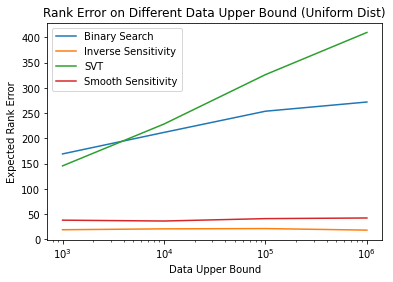

In [9]:
plt.clf()
plt.xscale("log")
plt.xlabel("Data Upper Bound")
plt.ylabel("Expected Rank Error")
plt.title("Rank Error on Different Data Upper Bound (Uniform Dist)")

xAxis = [1000, 10000, 100000, 1000000]
plt.plot(xAxis, experiment_uniform_expected_rank_error[0], label="Binary Search")
plt.plot(xAxis, experiment_uniform_expected_rank_error[1], label="Inverse Sensitivity")
plt.plot(xAxis, experiment_uniform_expected_rank_error[2], label="SVT")
plt.plot(xAxis, experiment_uniform_expected_rank_error[3], label="Smooth Sensitivity")
plt.legend()

print(experiment_uniform_expected_rank_error)

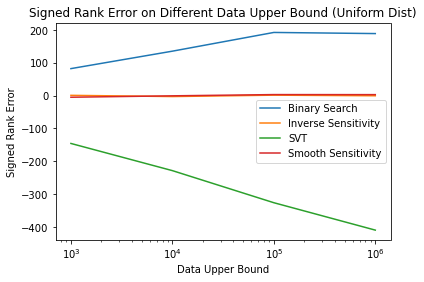

In [10]:
plt.clf()
plt.xscale("log")
plt.xlabel("Data Upper Bound")
plt.ylabel("Signed Rank Error")
plt.title("Signed Rank Error on Different Data Upper Bound (Uniform Dist)")

xAxis = [1000, 10000, 100000, 1000000]
plt.plot(xAxis, experiment_uniform_expected_rank_error_signed[0], label="Binary Search")
plt.plot(xAxis, experiment_uniform_expected_rank_error_signed[1], label="Inverse Sensitivity")
plt.plot(xAxis, experiment_uniform_expected_rank_error_signed[2], label="SVT")
plt.plot(xAxis, experiment_uniform_expected_rank_error_signed[3], label="Smooth Sensitivity")
plt.legend()

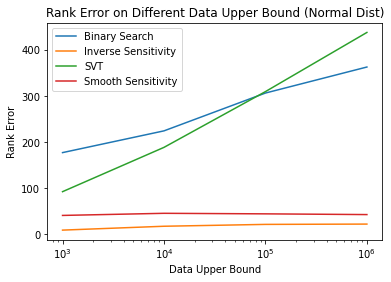

In [12]:
plt.clf()
plt.xscale("log")
plt.xlabel("Data Upper Bound")
plt.ylabel("Rank Error")
plt.title("Rank Error on Different Data Upper Bound (Normal Dist)")

xAxis = [1000, 10000, 100000, 1000000]
plt.plot(xAxis, experiment_normal_expected_rank_error[0], label="Binary Search")
plt.plot(xAxis, experiment_normal_expected_rank_error[1], label="Inverse Sensitivity")
plt.plot(xAxis, experiment_normal_expected_rank_error[2], label="SVT")
plt.plot(xAxis, experiment_normal_expected_rank_error[3], label="Smooth Sensitivity")
plt.legend()

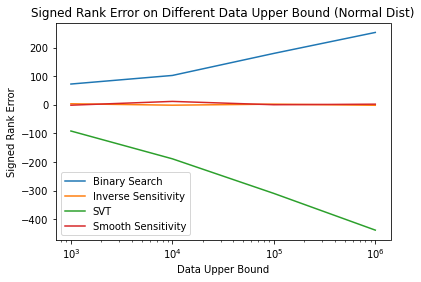

In [13]:
plt.clf()
plt.xscale("log")
plt.xlabel("Data Upper Bound")
plt.ylabel("Signed Rank Error")
plt.title("Signed Rank Error on Different Data Upper Bound (Normal Dist)")

xAxis = [1000, 10000, 100000, 1000000]
plt.plot(xAxis, experiment_normal_expected_rank_error_signed[0], label="Binary Search")
plt.plot(xAxis, experiment_normal_expected_rank_error_signed[1], label="Inverse Sensitivity")
plt.plot(xAxis, experiment_normal_expected_rank_error_signed[2], label="SVT")
plt.plot(xAxis, experiment_normal_expected_rank_error_signed[3], label="Smooth Sensitivity")
plt.legend()

# Experiment 2

$N=1000$, $\max x_i = 10000$, $U=100\max x_i$, change $\epsilon$

In [ ]:
experiment_uniform_expected_rank_error = [
    [],
    [],
    [],
    []
]

experiment_uniform_expected_rank_error_signed = [
    [],
    [],
    [],
    []
]

do_experiment_uniform(epsilon=0.01, U=10000*100, N=1000, M=10000, num_of_sample=500)
do_experiment_uniform(epsilon=0.02, U=10000*100, N=1000, M=10000, num_of_sample=500)
do_experiment_uniform(epsilon=0.04, U=10000*100, N=1000, M=10000, num_of_sample=500)
do_experiment_uniform(epsilon=0.08, U=10000*100, N=1000, M=10000, num_of_sample=500)
do_experiment_uniform(epsilon=0.16, U=10000*100, N=1000, M=10000, num_of_sample=500)
do_experiment_uniform(epsilon=0.32, U=10000*100, N=1000, M=10000, num_of_sample=500)
do_experiment_uniform(epsilon=0.64, U=10000*100, N=1000, M=10000, num_of_sample=500)
do_experiment_uniform(epsilon=1.28, U=10000*100, N=1000, M=10000, num_of_sample=500)

In [ ]:
experiment_normal_expected_rank_error = [
    [],
    [],
    [],
    []
]

experiment_normal_expected_rank_error_signed = [
    [],
    [],
    [],
    []
]

do_experiment_normal(epsilon=0.01, U=10000*100, N=1000, M=10000, num_of_sample=500)
do_experiment_normal(epsilon=0.02, U=10000*100, N=1000, M=10000, num_of_sample=500)
do_experiment_normal(epsilon=0.04, U=10000*100, N=1000, M=10000, num_of_sample=500)
do_experiment_normal(epsilon=0.08, U=10000*100, N=1000, M=10000, num_of_sample=500)
do_experiment_normal(epsilon=0.16, U=10000*100, N=1000, M=10000, num_of_sample=500)
do_experiment_normal(epsilon=0.32, U=10000*100, N=1000, M=10000, num_of_sample=500)
do_experiment_normal(epsilon=0.64, U=10000*100, N=1000, M=10000, num_of_sample=500)
do_experiment_normal(epsilon=1.28, U=10000*100, N=1000, M=10000, num_of_sample=500)

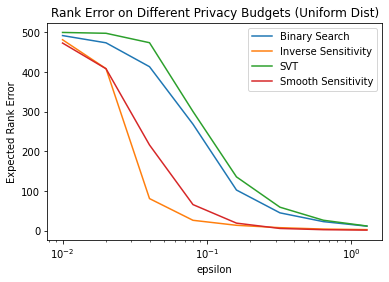

In [18]:
plt.clf()
plt.xscale("log")
plt.xlabel("epsilon")
plt.ylabel("Expected Rank Error")
plt.title("Rank Error on Different Privacy Budgets (Uniform Dist)")

xAxis = [0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.28]
plt.plot(xAxis, experiment_uniform_expected_rank_error[0], label="Binary Search")
plt.plot(xAxis, experiment_uniform_expected_rank_error[1], label="Inverse Sensitivity")
plt.plot(xAxis, experiment_uniform_expected_rank_error[2], label="SVT")
plt.plot(xAxis, experiment_uniform_expected_rank_error[3], label="Smooth Sensitivity")
plt.legend()

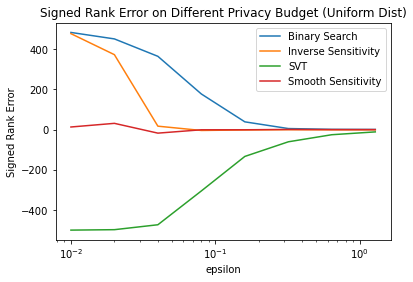

In [10]:
plt.clf()
plt.xscale("log")
plt.xlabel("epsilon")
plt.ylabel("Signed Rank Error")
plt.title("Signed Rank Error on Different Privacy Budgets (Uniform Dist)")

xAxis = [0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.28]
plt.plot(xAxis, experiment_uniform_expected_rank_error_signed[0], label="Binary Search")
plt.plot(xAxis, experiment_uniform_expected_rank_error_signed[1], label="Inverse Sensitivity")
plt.plot(xAxis, experiment_uniform_expected_rank_error_signed[2], label="SVT")
plt.plot(xAxis, experiment_uniform_expected_rank_error_signed[3], label="Smooth Sensitivity")
plt.legend()

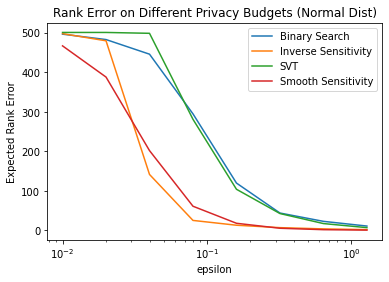

In [19]:
plt.clf()
plt.xscale("log")
plt.xlabel("epsilon")
plt.ylabel("Expected Rank Error")
plt.title("Rank Error on Different Privacy Budgets (Normal Dist)")

xAxis = [0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.28]
plt.plot(xAxis, experiment_normal_expected_rank_error[0], label="Binary Search")
plt.plot(xAxis, experiment_normal_expected_rank_error[1], label="Inverse Sensitivity")
plt.plot(xAxis, experiment_normal_expected_rank_error[2], label="SVT")
plt.plot(xAxis, experiment_normal_expected_rank_error[3], label="Smooth Sensitivity")
plt.legend()

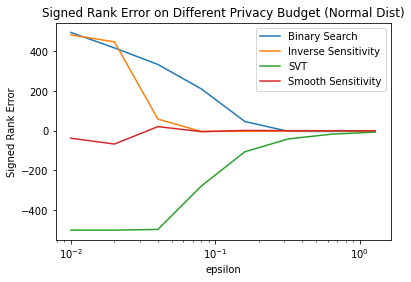

In [13]:
plt.clf()
plt.xscale("log")
plt.xlabel("epsilon")
plt.ylabel("Signed Rank Error")
plt.title("Signed Rank Error on Different Privacy Budgets (Normal Dist)")

xAxis = [0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.28]
plt.plot(xAxis, experiment_normal_expected_rank_error_signed[0], label="Binary Search")
plt.plot(xAxis, experiment_normal_expected_rank_error_signed[1], label="Inverse Sensitivity")
plt.plot(xAxis, experiment_normal_expected_rank_error_signed[2], label="SVT")
plt.plot(xAxis, experiment_normal_expected_rank_error_signed[3], label="Smooth Sensitivity")
plt.legend()

## Experiment 3

$\epsilon=0.1$, $N=1000$, $\max x_i = 10000$, change $U$

In [5]:
experiment_uniform_expected_rank_error = [
    [],
    [],
    [],
    []
]

experiment_uniform_expected_rank_error_signed = [
    [],
    [],
    [],
    []
]

do_experiment_uniform(epsilon=0.1, U=10000*2, N=1000, M=10000, num_of_sample=500)
do_experiment_uniform(epsilon=0.1, U=10000*4, N=1000, M=10000, num_of_sample=500)
do_experiment_uniform(epsilon=0.1, U=10000*8, N=1000, M=10000, num_of_sample=500)
do_experiment_uniform(epsilon=0.1, U=10000*16, N=1000, M=10000, num_of_sample=500)
do_experiment_uniform(epsilon=0.1, U=10000*32, N=1000, M=10000, num_of_sample=500)
do_experiment_uniform(epsilon=0.1, U=10000*64, N=1000, M=10000, num_of_sample=500)
do_experiment_uniform(epsilon=0.1, U=10000*128, N=1000, M=10000, num_of_sample=500)
do_experiment_uniform(epsilon=0.1, U=10000*256, N=1000, M=10000, num_of_sample=500)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
16

In [6]:
experiment_normal_expected_rank_error = [
    [],
    [],
    [],
    []
]

experiment_normal_expected_rank_error_signed = [
    [],
    [],
    [],
    []
]

do_experiment_normal(epsilon=0.01, U=10000*2, N=1000, M=10000, num_of_sample=500)
do_experiment_normal(epsilon=0.02, U=10000*4, N=1000, M=10000, num_of_sample=500)
do_experiment_normal(epsilon=0.04, U=10000*8, N=1000, M=10000, num_of_sample=500)
do_experiment_normal(epsilon=0.08, U=10000*16, N=1000, M=10000, num_of_sample=500)
do_experiment_normal(epsilon=0.16, U=10000*32, N=1000, M=10000, num_of_sample=500)
do_experiment_normal(epsilon=0.32, U=10000*64, N=1000, M=10000, num_of_sample=500)
do_experiment_normal(epsilon=0.64, U=10000*128, N=1000, M=10000, num_of_sample=500)
do_experiment_normal(epsilon=1.28, U=10000*256, N=1000, M=10000, num_of_sample=500)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
16

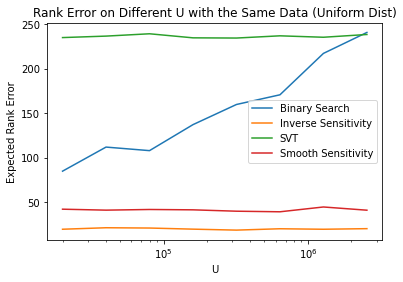

In [22]:
plt.clf()
plt.xscale("log")
plt.xlabel("U")
plt.ylabel("Expected Rank Error")
plt.title("Rank Error on Different U with the Same Data (Uniform Dist)")

xAxis = [10000*2, 10000*4,10000*8, 10000*16,10000*32,10000*64,10000*128,10000*256]
plt.plot(xAxis, experiment_uniform_expected_rank_error[0], label="Binary Search")
plt.plot(xAxis, experiment_uniform_expected_rank_error[1], label="Inverse Sensitivity")
plt.plot(xAxis, experiment_uniform_expected_rank_error[2], label="SVT")
plt.plot(xAxis, experiment_uniform_expected_rank_error[3], label="Smooth Sensitivity")
plt.legend()

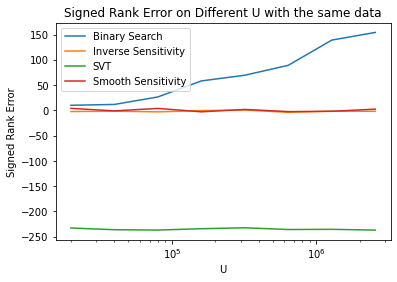

In [17]:
plt.clf()
plt.xscale("log")
plt.xlabel("U")
plt.ylabel("Signed Rank Error")
plt.title("Signed Rank Error on Different U with the Same Data (Uniform Dist)")

xAxis = [10000*2, 10000*4,10000*8, 10000*16,10000*32,10000*64,10000*128,10000*256]
plt.plot(xAxis, experiment_uniform_expected_rank_error_signed[0], label="Binary Search")
plt.plot(xAxis, experiment_uniform_expected_rank_error_signed[1], label="Inverse Sensitivity")
plt.plot(xAxis, experiment_uniform_expected_rank_error_signed[2], label="SVT")
plt.plot(xAxis, experiment_uniform_expected_rank_error_signed[3], label="Smooth Sensitivity")
plt.legend()

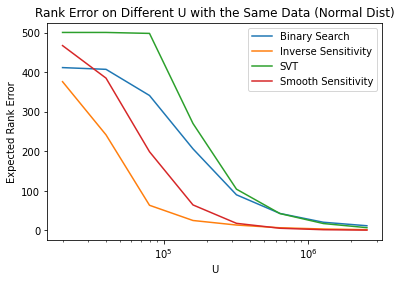

In [23]:
plt.clf()
plt.xscale("log")
plt.xlabel("U")
plt.ylabel("Expected Rank Error")
plt.title("Rank Error on Different U with the Same Data (Normal Dist)")

xAxis = [10000*2, 10000*4,10000*8, 10000*16,10000*32,10000*64,10000*128,10000*256]
plt.plot(xAxis, experiment_normal_expected_rank_error[0], label="Binary Search")
plt.plot(xAxis, experiment_normal_expected_rank_error[1], label="Inverse Sensitivity")
plt.plot(xAxis, experiment_normal_expected_rank_error[2], label="SVT")
plt.plot(xAxis, experiment_normal_expected_rank_error[3], label="Smooth Sensitivity")
plt.legend()

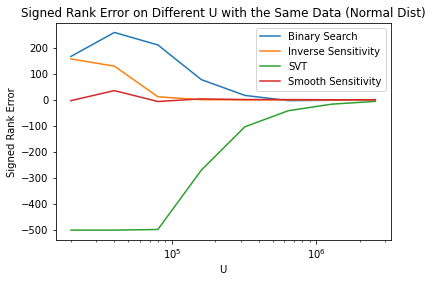

In [24]:
plt.clf()
plt.xscale("log")
plt.xlabel("U")
plt.ylabel("Signed Rank Error")
plt.title("Signed Rank Error on Different U with the Same Data (Normal Dist)")

xAxis = [10000*2, 10000*4,10000*8, 10000*16,10000*32,10000*64,10000*128,10000*256]
plt.plot(xAxis, experiment_normal_expected_rank_error_signed[0], label="Binary Search")
plt.plot(xAxis, experiment_normal_expected_rank_error_signed[1], label="Inverse Sensitivity")
plt.plot(xAxis, experiment_normal_expected_rank_error_signed[2], label="SVT")
plt.plot(xAxis, experiment_normal_expected_rank_error_signed[3], label="Smooth Sensitivity")
plt.legend()

## Experiment 4

Repeat Experiment 1 with read world data

In [10]:
experiment_book_review_expected_rank_error = [
    [],
    [],
    [],
    []
]

experiment_book_review_expected_rank_error_signed = [
    [],
    [],
    [],
    []
]

do_experiment_book_review(epsilon=0.1)
do_experiment_book_review(epsilon=0.2)
do_experiment_book_review(epsilon=0.4)
do_experiment_book_review(epsilon=0.8)
do_experiment_book_review(epsilon=1.6)
do_experiment_book_review(epsilon=3.2)

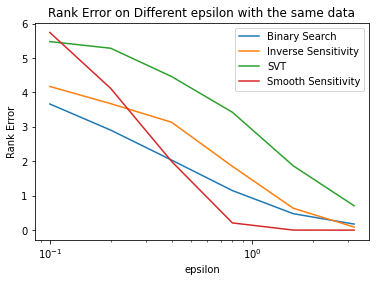

In [11]:
plt.clf()
plt.xscale("log")
plt.xlabel("epsilon")
plt.ylabel("Rank Error")
plt.title("Rank Error on Different epsilon with the same data")

xAxis = [0.1, 0.2, 0.4, 0.8, 1.6, 3.2]
plt.plot(xAxis, experiment_book_review_expected_rank_error[0], label="Binary Search")
plt.plot(xAxis, experiment_book_review_expected_rank_error[1], label="Inverse Sensitivity")
plt.plot(xAxis, experiment_book_review_expected_rank_error[2], label="SVT")
plt.plot(xAxis, experiment_book_review_expected_rank_error[3], label="Smooth Sensitivity")
plt.legend()

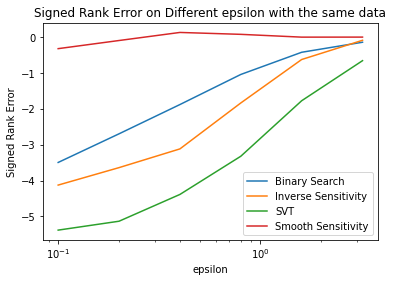

In [12]:
plt.clf()
plt.xscale("log")
plt.xlabel("epsilon")
plt.ylabel("Signed Rank Error")
plt.title("Signed Rank Error on Different epsilon with the same data")

xAxis = [0.1, 0.2, 0.4, 0.8, 1.6, 3.2]
plt.plot(xAxis, experiment_book_review_expected_rank_error_signed[0], label="Binary Search")
plt.plot(xAxis, experiment_book_review_expected_rank_error_signed[1], label="Inverse Sensitivity")
plt.plot(xAxis, experiment_book_review_expected_rank_error_signed[2], label="SVT")
plt.plot(xAxis, experiment_book_review_expected_rank_error_signed[3], label="Smooth Sensitivity")
plt.legend()

In [6]:
experiment_uniform_expected_rank_error

[[160.465, 183.785, 239.13, 271.72],
 [21.54, 18.91, 22.8, 22.125],
 [145.02, 241.925, 323.99, 412.465],
 [42.61, 41.295, 39.85, 42.385]]